# Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.preprocessing import StandardScaler


In [2]:
# libraries for our model

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [3]:
# loading the diabetes dataset to pandas DataFrame

df = pd.read_csv("/content/diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# printing the head of data

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# shape of the dataset 

df.shape

(768, 9)

In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

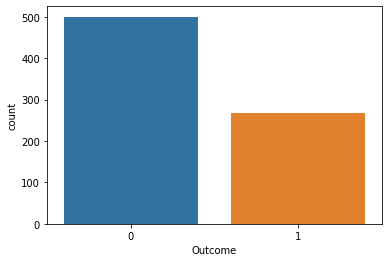

In [8]:
# plotting of the target column

sns.countplot(x="Outcome",data = df)

In [9]:
# seperating the data and its label

x = df.drop(columns="Outcome",axis = 1)

y = df["Outcome"]

In [10]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
x_train, x_test, y_train, y_test = train_test_split(
                                                x,
                                                y,
                                                test_size=0.2,
                                                random_state=42
)

In [14]:
print(x_train.shape)
print(x_test.shape)
print("* "*10)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
* * * * * * * * * * 
(614,)
(154,)


In [15]:
print(x.shape)

(768, 8)


In [16]:
# scaling is required in the case of ANN model so as to reduce the domination of bigger value on smaller value

# ex. salary vs age

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)


In [17]:
x_train_scaled

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [18]:
# sequential model are the linearly stacked layers of model

# if you wish to change the activation fn you can do that

# number of neurons can be changed 


model = Sequential()

model.add(Dense(20,activation="relu",input_dim=8))
#model.add(Dropout(0.2))
model.add(Dense(15,activation="relu"))
model.add(Dense(9,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 9)                 144       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [20]:
#model.layers[1].get_weights()

In [21]:
# here we are adding the functionality to the model

model.compile(
            loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"]
)

In [22]:
# here we are fitting the data to model


history = model.fit(
                  x_train_scaled,
                  y_train,
                  verbose=True,
                  batch_size=32,
                  validation_split=0.1,
                  epochs=100
)

Epoch 1/100
18/18 [==============================] - 2s 33ms/step - loss: 0.6922 - accuracy: 0.5652 - val_loss: 0.6754 - val_accuracy: 0.6290
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6660 - accuracy: 0.6920 - val_loss: 0.6594 - val_accuracy: 0.6774
Epoch 3/100
18/18 [==============================] - 0s 12ms/step - loss: 0.6466 - accuracy: 0.7355 - val_loss: 0.6445 - val_accuracy: 0.7742
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6272 - accuracy: 0.7409 - val_loss: 0.6284 - val_accuracy: 0.7742
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6064 - accuracy: 0.7536 - val_loss: 0.6116 - val_accuracy: 0.7581
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 0.5849 - accuracy: 0.7554 - val_loss: 0.5940 - val_accuracy: 0.7742
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.5607 - accuracy: 0.7518 - val_loss: 0.5706 - val_accuracy: 0.7742
Epoch 8/100

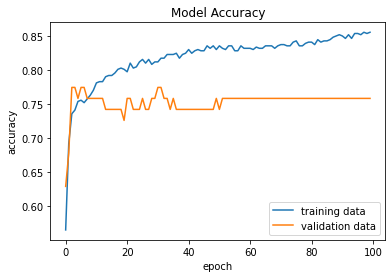

In [23]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training data","validation data"],loc="lower right")

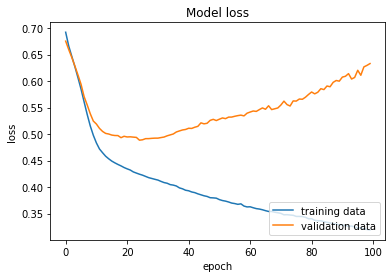

In [24]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training data","validation data"],loc="lower right")

In [25]:
y_log = model.predict(x_test_scaled)
y_log[:1]

5/5 [==============================] - 0s 4ms/step


array([[0.14008734]], dtype=float32)

In [26]:
y_pred = np.where(y_log>0.5,1,0)

In [27]:
y_pred[:1]

array([[0]])

In [28]:
# Accuracy score

acc = accuracy_score(y_test,y_pred)

print("Accuracy score : ",acc)

Accuracy score :  0.7337662337662337


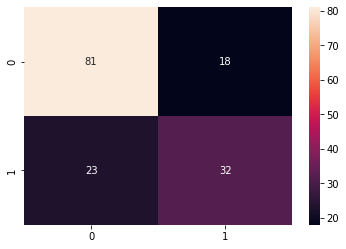

In [29]:
# plotting the confusion matrix

cnf = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf,annot= True)

In [30]:
# generating the classification report

clf = classification_report(y_test,y_pred)

print(clf)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        99
           1       0.64      0.58      0.61        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [31]:
x_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [32]:
#input_data = (9,112,82,24,0,28.2,1.282,50)
input_data = (6,134,80,37,370,46.2,0.238,46)

input_data = np.asarray(input_data)

# we need to reshape the array as we are passing for single instance

input_data_reshape = input_data.reshape(1,-1)

x_test_scaling = scaler.transform(input_data_reshape)

prediction = model.predict(x_test_scaling)
y_pred = np.where(prediction>0.5,1,0)

if (y_pred[0][0]==0):
  print("The person is not suffering from diabetes")
else:
  print("The person is suffering from diabetes")



1/1 [==============================] - 0s 24ms/step
The person is suffering from diabetes


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
y_train.head(5)

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

In [34]:
import pickle

In [35]:
filename = "trained_model.sav"
pickle.dump(model,open(filename,"wb"))

In [36]:
filename_sc = "scaler.pkl"
pickle.dump(scaler,open(filename_sc,"wb"))

In [37]:
# loading the model 

loaded_model = pickle.load(open("trained_model.sav","rb"))

In [38]:
# loading the scaler object

loaded_scaler = pickle.load(open("scaler.pkl","rb"))

In [39]:
#input_data = (9,112,82,24,0,28.2,1.282,50)
input_data = (6,134,80,37,370,46.2,0.238,46)

input_data = np.asarray(input_data)

# we need to reshape the array as we are passing for single instance

input_data_reshape = input_data.reshape(1,-1)

x_test_scaling = loaded_scaler.transform(input_data_reshape)

prediction = loaded_model.predict(x_test_scaling)
y_pred = np.where(prediction>0.5,1,0)

if (y_pred[0][0]==0):
  print("The person is not suffering from diabetes")
else:
  print("The person is suffering from diabetes")



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 139ms/step
The person is suffering from diabetes


In [40]:
!pip install keras 
!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=936ed01169926da5da83c0c24a7258d21a0f7f50f8ffc2aa54dbf831657c64c5
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from ann_visualizer.visualize import ann_viz

ann_viz(model)

In [42]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 5.9 MB/s eta 0:00:00


In [43]:
x_train.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [44]:
%%writefile app.py

import numpy as np
import pickle
import streamlit as st

# loading the saved model
loaded_model = pickle.load(open("/content/trained_model.sav","rb"))

#loadiing the scaler object
loaded_scaler = pickle.load(open("/content/scaler.pkl","rb"))


def diabetes_prediction(input_data):

  input_data = np.asarray(input_data)

  # we need to reshape the array as we are passing for single instance

  input_data_reshape = input_data.reshape(1,-1)

  x_test_scaling = loaded_scaler.transform(input_data_reshape)

  prediction = loaded_model.predict(x_test_scaling)
  y_pred = np.where(prediction>0.5,1,0)

  if (y_pred[0][0]==0):
    print("The person is not suffering from diabetes")
  else:
    print("The person is suffering from diabetes")


def main():

  # giving the title to the web page
  st.title("Diabetes Prediction Web Application")

  # getting the input from the web page

  Pregnancies = st.text_input("Number of Pregnancies")
  Glucose = st.text_input("Glucose Level")
  BloodPressure = st.text_input("BloodPressure Level")
  SkinThickness = st.text_input("SkinThickness")
  Insulin = st.text_input("Insulin Level")
  BMI = st.text_input("BMI Value")
  DiabetesPedigreeFunction = st.text_input("DiabetesPedigreeFunction Value")
  Age = st.text_input("Age")

  # code for the prediction 
  diagnosis = ""

  # creating the button for prediction

  if st.button("Diabetes Test Result"):
    diagnosis = diabetes_prediction([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age])

  st.success(diagnosis)

if __name__=='__main__':
  main()


Writing app.py


In [45]:
pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=c0b89cde624b0c1aeb309bbe85dd5b531caa76dbf373a476148bde8877aa46f2
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [46]:
pip install protobuf==3.20.*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [47]:
#docker run -it python:3.10 /bin/bash
# Within the Docker container:
!pip3 install google-cloud-logging==3.1.1 protobuf==4.21.0
!python3 -c "import google.cloud.logging"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.6/407.6 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 KB 14.8 MB/s eta 0:00:00
Reason for being yanked: Required python version not configured correctly (https://github.com/protocolbuffers/protobuf/issues/10076)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.0
    Uninstalling google-api-core-2.11.0:
      Successfully uninstalled google-api-core-2.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages tha

In [48]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

In [49]:
pip install --upgrade "protobuf<=3.20.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.0
    Uninstalling protobuf-4.21.0:
      Successfully uninstalled protobuf-4.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
googleapis-common-protos 1.57.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-translate 3.8.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21

In [50]:
!pip install 'protobuf<=3.20.1' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
googleapis-common-protos 1.57.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-translate 3.8.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] | fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.62.246:8501

npx: installed 22 in 4.351s
your url is: https://six-moments-smile-34-125-62-246.loca.lt
2023-01-04 18:09:59.575782: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
1/1 [==============================] - 0s 104ms/step
The person is suffering from diabetes
